# **DS : Time Series Sunsplot**
---
## **Outcome Utama**

1. **Pemahaman Pola Historis**
   - Mengidentifikasi tren, musiman (seasonality), dan fluktuasi dalam data.
   - Pola siklus tahunan/mingguan ditemukan dan menjadi dasar perencanaan bisnis.

2. **Model Prediksi Akurat**
   - Menggunakan model seperti **ARIMA**, **SARIMA**, atau **LSTM** untuk prediksi masa depan.
   - Mengukur akurasi model dengan metrik seperti:
     - **RMSE (Root Mean Squared Error)**
     - **MAE (Mean Absolute Error)**
     - **MAPE (Mean Absolute Percentage Error)**
   - Model terbaik memberikan hasil prediksi dengan error rendah.

3. **Deteksi Anomali**
   - Mengidentifikasi outlier atau kejadian abnormal, seperti:
     - Lonjakan mendadak dalam penjualan.
     - Penurunan performa sistem secara tiba-tiba.
   - Membantu mitigasi risiko dan respons cepat terhadap masalah.

4. **Perencanaan dan Pengambilan Keputusan**
   - Forecasting digunakan untuk mendukung pengambilan keputusan strategis, seperti:
     - Pengelolaan inventaris.
     - Alokasi sumber daya.
     - Strategi pemasaran.
   - Membantu organisasi mempersiapkan diri menghadapi musim puncak atau fluktuasi pasar.

5. **Automasi dan Visualisasi**
   - Membuat dashboard interaktif untuk monitoring data secara real-time.
   - Automasi pipeline analisis untuk pembaruan model secara berkala.

6. **Dampak Bisnis**
   - **Efisiensi operasional** meningkat dengan prediksi yang lebih akurat.
   - **Optimalisasi biaya dan sumber daya** berdasarkan data historis dan prediktif.
   - Mengidentifikasi **peluang bisnis baru** berdasarkan wawasan tren masa depan.

---

### **Kesimpulan**
Proyek data science berbasis time series memberikan wawasan berharga untuk memahami pola data historis dan memproyeksikan masa depan. Hal ini memungkinkan organisasi untuk mengambil keputusan berbasis data yang lebih strategis dan responsif terhadap perubahan.


## **1.Data Wrangling**
---
pada tahap ini kita akan mencoba untuk melihat datasheet yang kita gunakan dalam project ini dan memeriksa proporsi dari jumlah kolom dan baris serta mengecek ada atau tidak adanya data yang hilang ataupun duplikat

In [1]:
# import library yang dibutuhkan 
import numpy as np                  # Library untuk komputasi numerik dengan python 
import pandas as pd                 # Library untuk pengolahan dataframe dengan pandas 
import warnings                     # Library untuk handling error 

import matplotlib.pyplot as plt     # Library untuk visualisasi data dengan matplotlib 
import seaborn as sns               # Library untuk visualisasi data dengan seaborn 

from dateutil.parser import parse   # Libary untuk pengolahan dataframe time series 

# variabel untuk menghilangkan error dan visualisasi
warnings.filterwarnings('ignore')
dateparse=lambda dates:parse(dates)
%matplotlib inline

### **1.1 Load datasheet**
---
pada bagian ini kita akan melakukan file import datasheet yang akan kita analisis ke pandas 

In [2]:
# load file csv datasheet ke pandas 
df = pd.read_csv('../data/raw/Sunspots.csv', parse_dates=['Date'], date_parser=dateparse)

# kemudian tampilkan 5 datasheet teratas 
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


<b>Insight :</b>
<p>dari hasil berikut diketahui bahwa kita memiliki fitur data dalam bentuk rentang waktu dan total jumlah mean sunspot number, 
kita akan menggunakan 2 fitur tersebut dan menghapus fitur unnamed karena kita tidak memerlukan fitur kolom tersebut dalam analisis kita</p>

### **1.2 Menghapus kolom unnamed**
---
kita akan menghapus kolom unnamed karena kita tidak memerlukan kolom ini dalam analisis kita 

In [3]:
df = df.drop(columns='Unnamed: 0', axis=True)
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


<b>Insight :</b>
<p>Setelah kita menghapus kolom unnamed: kita akan melakukan melakukan EDA</p>

### **1.3 Melihat Informasi dari datasheet**
---
selanjutnya kita akan melihat informasi dari datasheet yang kita punya

In [4]:
# melihat informasi dari datasheet yang kita punya 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               3252 non-null   datetime64[ns]
 1   Monthly Mean Total Sunspot Number  3252 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.9 KB


<b>Insight :</b>
<p> disini kita bisa tau bahwa pada kolom fitur date sudah memiliki tipe data datetime64 hal ini bisa terjadi karena diawal kita sudah menambahkan library dateparser untuk kolom fitur date</p> 

### **1.3 Melihat jumlah proporsi dari setiap fitur datasheet**
---
<p>pada tahap ini kita ingin melihat jumlah baris dan kolom dari datasheet yang kita punya</p>

In [5]:
# melihat proporsi jumlah kolom dan baris dari datasheet yang kita punya 
print(f'jumlah baris pada datasheet adalah : {df.shape[0]} baris') # cek jumlah baris pada datasheet 
print(f'jumlah kolom pada datasheet adalah : {df.shape[1]} kolom') # cek jumlah kolom pada datasheet 

jumlah baris pada datasheet adalah : 3252 baris
jumlah kolom pada datasheet adalah : 2 kolom


<b>Insight :</b>
<p>dari hasil analisis tersebut dapat diketahui bahwa kita memiliki jumlah baris sebanyak 3252 baris dan 2 kolom data</p>

## **2 Exploratory Data Analyst (EDA)**
---
pada tahap ini kita akan melaukan analisis pada datasheet yang kita punya dan melihat insight apa saja yang bisa kita dapat dari proses analisis tersebut

In [6]:
df_non_index = df.copy() # Making a copy of initial data.Both will be used as required
# The 'df_non_index' dataframe is used for some exploratory data analysis  
# Later we will convert Date colum as index in  'df' dataframe

### 2.1 **Profit of datetime formated data:**

<b>Insight :</b>
<ul>
    <li>You can do lot of date and time related operations easily without doing string opeations</li>
    <li>Here month is seprated and kept in another column named month so easily</li>
    <li>Afeter that year is seperated and used</li>
</ul>

In [7]:
df_non_index['Month']=df_non_index.Date.dt.month
df_non_index.head()

,Date,Monthly Mean Total Sunspot Number,Month
0,1749-01-31,96.7,1
1,1749-02-28,104.3,2
2,1749-03-31,116.7,3
3,1749-04-30,92.8,4
4,1749-05-31,141.7,5


<b>Insight : </b>
<ul>
    <li>Kode berikut mengekstraksi setiap tahun dalam dekade tersebut, misalnya dalam string '1749' karakter terakhir yaitu (posisi ke-3) adalah tahun 9 dari dekade itu, yang telah diekstracd dan disimpan di kolom lain bernama 'nth_year.</li>
    <li>untuk '1748' itu akan menjadi tahun 8.</li>
    <li>Tapi untuk '1750' itu akan menjadi tahun '0' yang harus 10. Dengan demikian .replace('0','10') diterapkan dan akhirnya diubah kembali menjadi int</li>
</ul>

In [8]:
df_non_index['nth_year'] =[int(str(i)[3]) for i in (df_non_index.Date.dt.year)] # Note this is list comprehension 
df_non_index['nth_year'].replace(0,10,inplace=True)
df_non_index.head(10)

,Date,Monthly Mean Total Sunspot Number,Month,nth_year
0,1749-01-31,96.7,1,9
1,1749-02-28,104.3,2,9
2,1749-03-31,116.7,3,9
3,1749-04-30,92.8,4,9
4,1749-05-31,141.7,5,9
5,1749-06-30,139.2,6,9
6,1749-07-31,158.0,7,9
7,1749-08-31,110.5,8,9
8,1749-09-30,126.5,9,9
9,1749-10-31,125.8,10,9


<b>Insight</b>
<p>setelah dilakukan sedikit preprocessing kita bisa melihat jumlah nth_year dan month secara lebih detail dan kita bisa mendapatkan insight lebih dalam untuk proses analisis selanjutnya</p>

### **2.2 Plotting the data using seaborn boxplot**

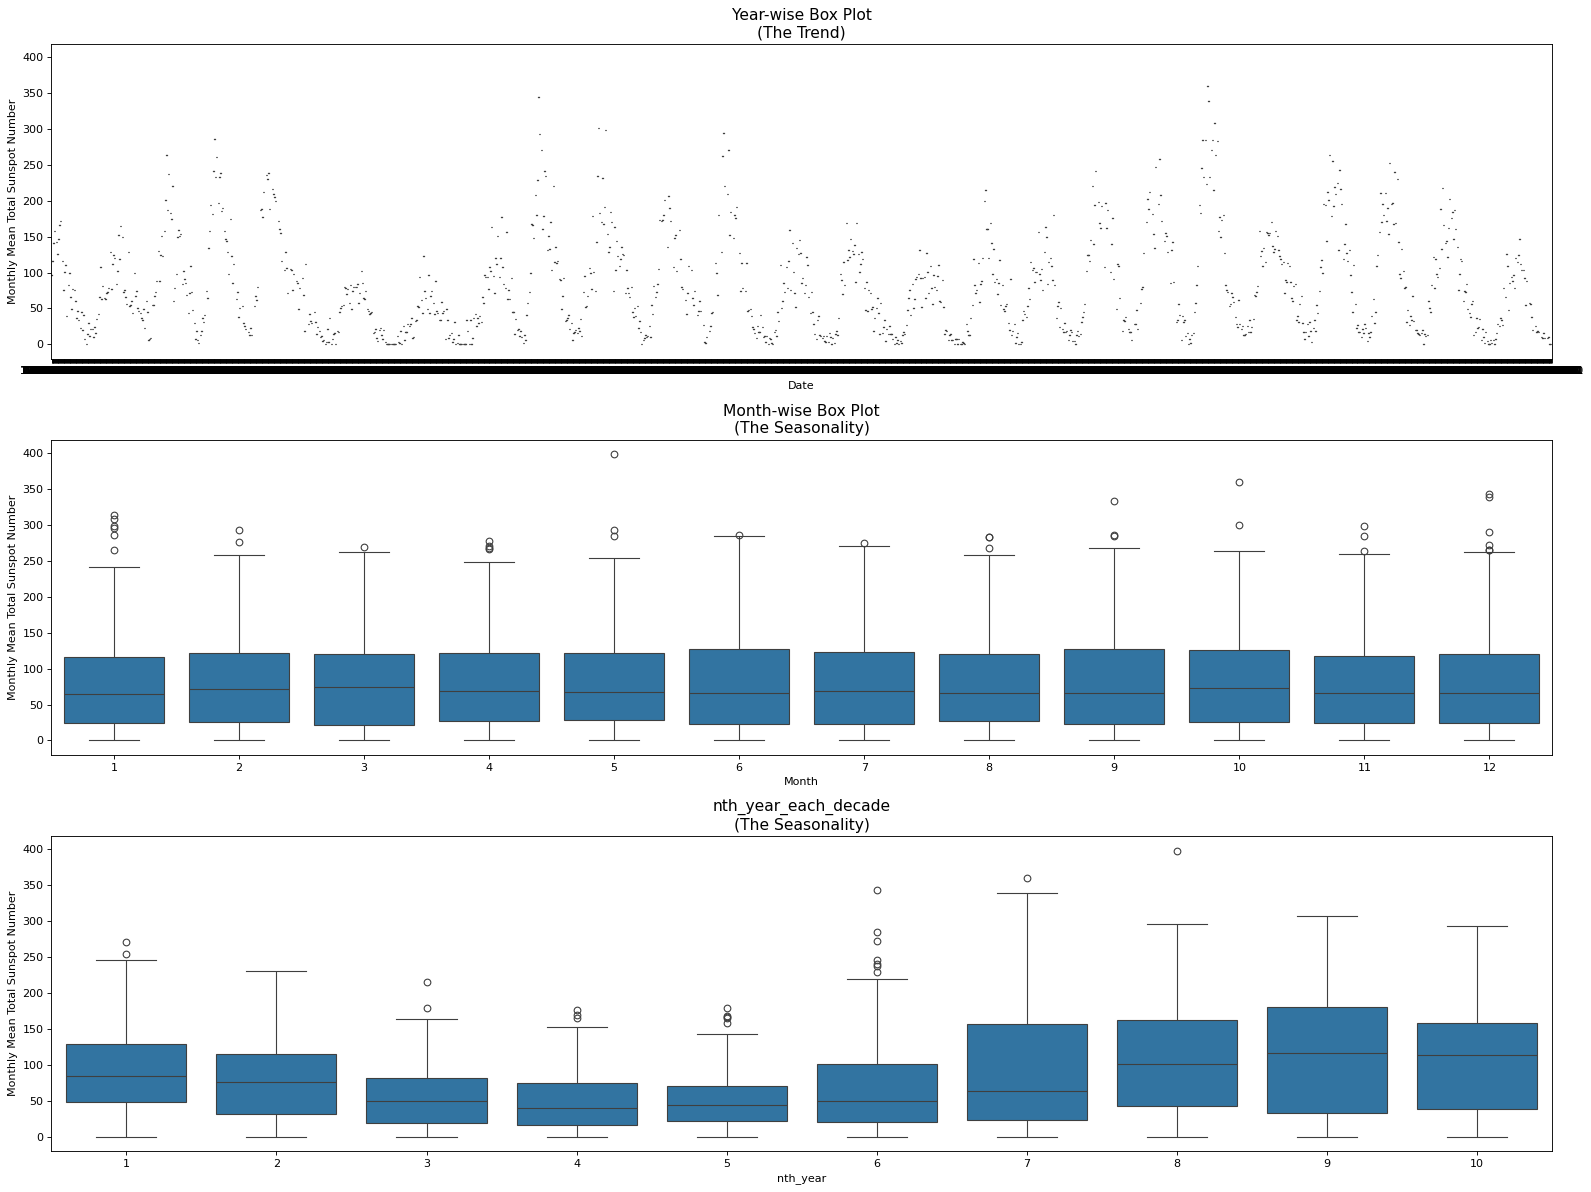

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(20,15), dpi= 80)
sns.boxplot(x='Date', y='Monthly Mean Total Sunspot Number', data=df_non_index, ax=axes[0])
sns.boxplot(x='Month', y='Monthly Mean Total Sunspot Number', data=df_non_index,ax = axes[1])
sns.boxplot(x='nth_year', y='Monthly Mean Total Sunspot Number', data=df_non_index,ax = axes[2])
# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=14); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=14)
axes[2].set_title('nth_year_each_decade\n(The Seasonality)', fontsize=14)
fig.tight_layout()
plt.show()

<b>Insight</b>
<p>sebagian besar data ternyata memiliki nilai outliers, kita tidak akan mempedulikan hal ini untuk saat ini, tapi mungkin ini akan berpengaruh ke beberapa model machine learning</p>

### **2.3 Explanation of above plot**
---
Distribusi data hampir sama di setiap bulan dengan sedikit outlier
Distribusi data di antara setiap tahun dalam dekade tidak sama . ## Kembali ke dataframe 'df' dan Membuat kolom Tanggal sebagai indeks

Setelah kita membuat kolom Tanggal sebagai indeks, sangat mudah untuk mengiris data berdasarkan indeks (yaitu tanggal) dan bahkan memplot di panda dengan kolom datetime sebagai indeks itu mudah.

In [10]:
df = df.set_index('Date')
df.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


In [11]:
df.tail()

,Monthly Mean Total Sunspot Number
Date,
2019-08-31,0.5
2019-09-30,1.1
2019-10-31,0.4
2019-11-30,0.5
2019-12-31,1.6


<Axes: xlabel='Date'>

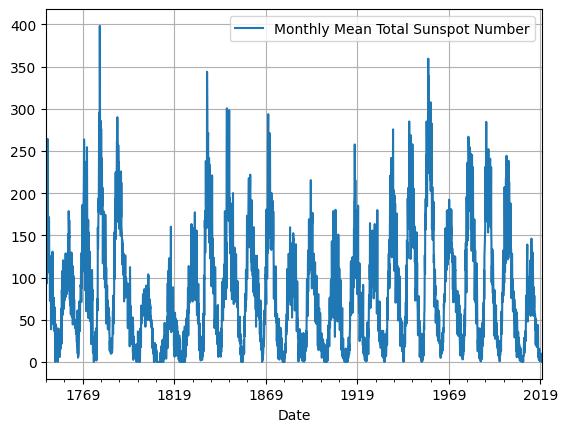

In [12]:
df.plot(grid=True)

### **The data is too to large to see it in a one graph, there are 3235 monthly entries from date 1749-01-31 to 2018-07-31**
---
Salah satu cara untuk mengiris data dan memvisualisasikan zona waktu tertentu. <br>
Plotly express menyediakan penggeser dan tombol untuk memilih zona waktu tertentu. <br>
Memeriksa keduanya: <br>

<Axes: xlabel='Date'>

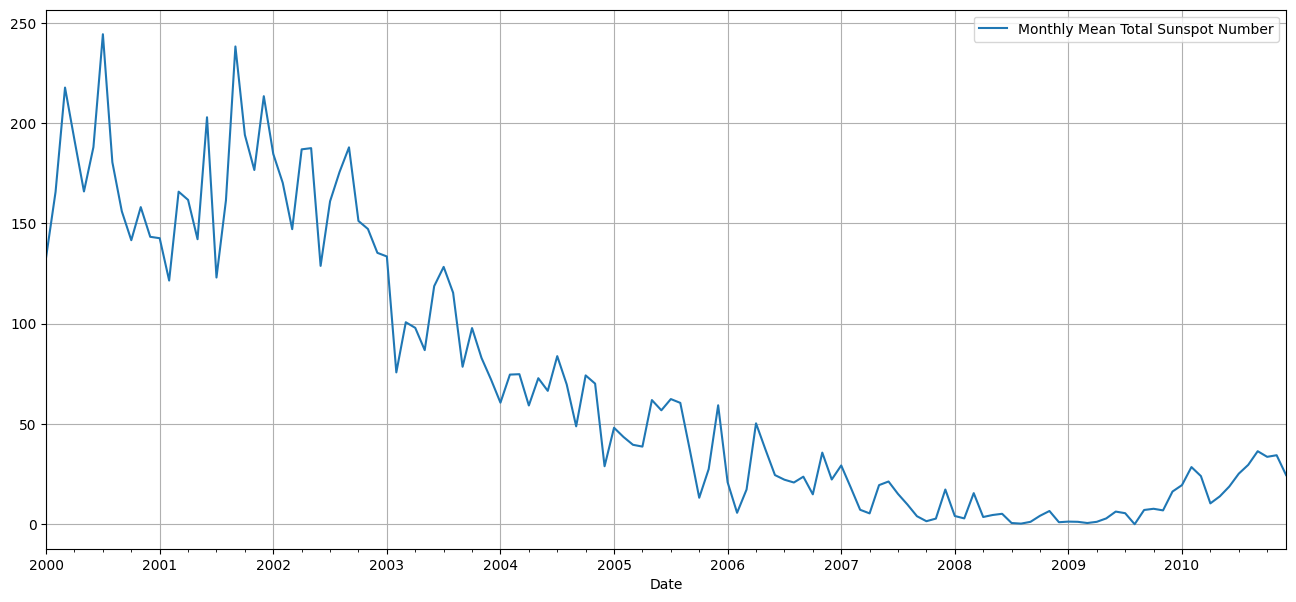

In [13]:
df_2018=df.loc['2000':'2010'] # Slicing all data from 2000 to 2010
df_2018.plot(figsize=(16,7),grid=True)

<b>Insight : </b>
<p>dari hasil visualisais tersebut dpaat diketahui bahwa dari rentang tahun 2000 sampai 2010 terjadi penurunan monthly mean total sunspot number</p>

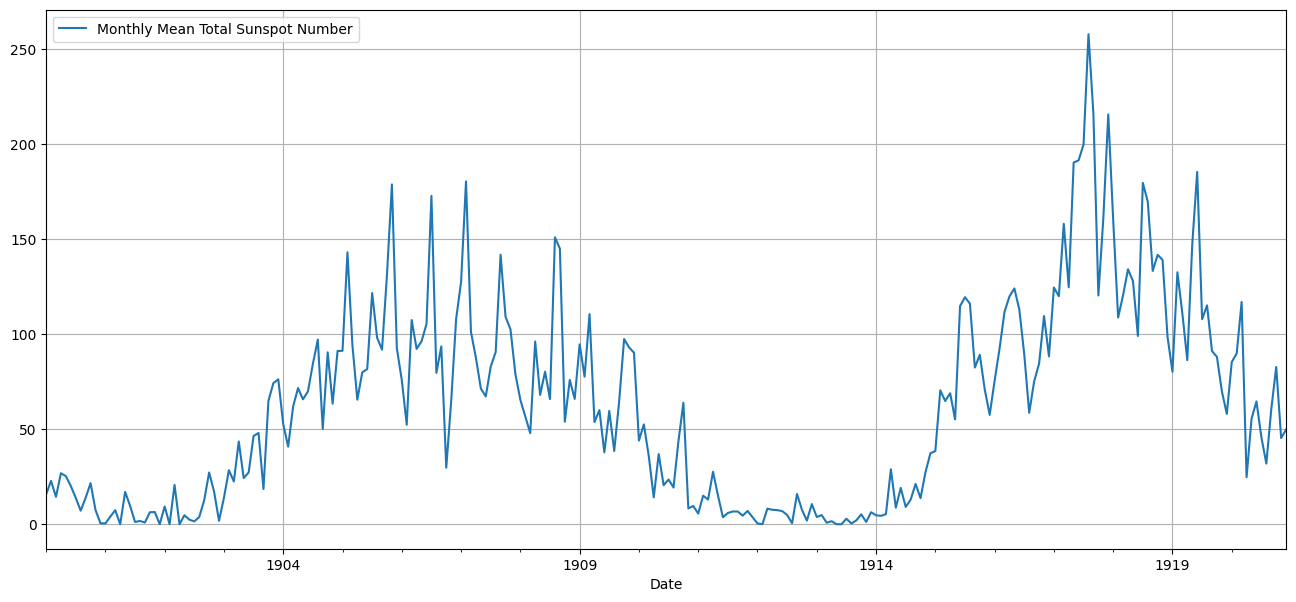

In [14]:
df_2018=df.loc['1900':'1920'] # Slicing all data from 1900 to 1910
df_2018.plot(figsize=(16,7),grid=True)
plt.show()

<b>Insight : </b>
<p>ternyata dari rentang tahun 1904 sampai 1919 grafik line plot menunjukan naik turun dan grafik tertinggi menunjukan 250 

### **Plotly Express**

In [ ]:
import plotly.express as px
import plotly.io as pio

# Misalnya, df_non_index adalah DataFrame yang sudah didefinisikan
# df_non_index harus memiliki kolom 'Date' dan 'Monthly Mean Total Sunspot Number'

fig = px.line(
    df_non_index,
    x='Date',
    y='Monthly Mean Total Sunspot Number',
    title='Mean Sunspot Slider'
)

# Mengaktifkan RangeSlider untuk sumbu X
fig.update_xaxes(rangeslider_visible=True)

pio.renderers.default = "browser"  # Atau "png"

# Menampilkan grafik
fig.show()


#### **Buttons options in plotly**

In [16]:
fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=10, label="10y", step="year", stepmode="backward"),
            dict(count=20, label="20y", step="year", stepmode="backward"),
            dict(count=30, label="30y", step="year", stepmode="backward"),
            dict(count=40, label="40y", step="year", stepmode="backward"),
            dict(count=50, label="50y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()